R² Score: 0.6876
Mean Squared Error (MSE): 18.9848


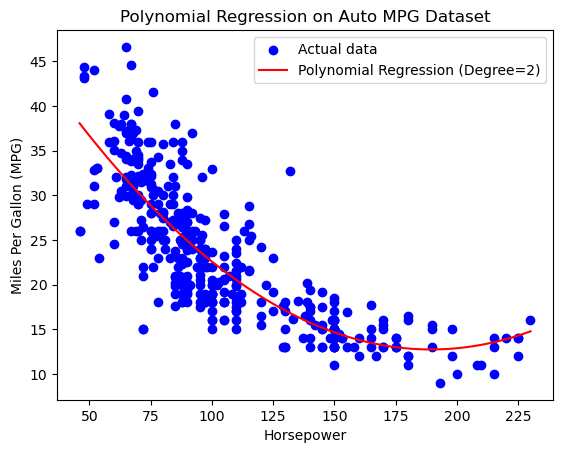

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

# Load the dataset
df = sns.load_dataset("mpg")

# Drop missing values
df = df.dropna()

# Select features and target variable
X = df["horsepower"].values.reshape(-1, 1)  # Independent variable
y = df["mpg"].values  # Dependent variable

# Convert horsepower to numeric (some versions have it as object)
X = X.astype(float)

# Apply Polynomial Transformation (degree 2 for quadratic fit)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Train the model
model = LinearRegression()
model.fit(X_poly, y)

# Predict values
y_pred = model.predict(X_poly)

# Calculate R² score and Mean Squared Error (MSE)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

# Print results
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Visualization
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_range_pred = model.predict(X_range_poly)

plt.scatter(X, y, color='blue', label="Actual data")
plt.plot(X_range, y_range_pred, color='red', label="Polynomial Regression (Degree=2)")
plt.xlabel("Horsepower")
plt.ylabel("Miles Per Gallon (MPG)")
plt.title("Polynomial Regression on Auto MPG Dataset")
plt.legend()
plt.show()
